In [81]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

In [22]:
iris = datasets.load_iris()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


arr_cl = np.array([],dtype =object)
arr_cr = np.array([],dtype =object)
for i in iris.target:
    match i:
        case 0:
            arr_cl = np.append(arr_cl,"setosa")
            arr_cr = np.append(arr_cr,"red")
        case 1:
            arr_cl = np.append(arr_cl,"versicolor")
            arr_cr = np.append(arr_cr,"blue")
        case 2:
            arr_cl = np.append(arr_cl,"virginica")
            arr_cr = np.append(arr_cr,"green")


data = {"Sepal length(cm)":iris.data[:,0],"Sepal width(cm)":iris.data[:,1],"Petal length(cm)":iris.data[:,2],"Petal width(cm)":iris.data[:,3],
         "Class label":iris.target, "Class names":arr_cl, "Class color":arr_cr}

data_frame = pd.DataFrame(data)
data_frame

,Sepal length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class label,Class names,Class color
0,5.1,3.5,1.4,0.2,0,setosa,red
1,4.9,3.0,1.4,0.2,0,setosa,red
2,4.7,3.2,1.3,0.2,0,setosa,red
3,4.6,3.1,1.5,0.2,0,setosa,red
4,5.0,3.6,1.4,0.2,0,setosa,red
5,5.4,3.9,1.7,0.4,0,setosa,red
6,4.6,3.4,1.4,0.3,0,setosa,red
7,5.0,3.4,1.5,0.2,0,setosa,red
8,4.4,2.9,1.4,0.2,0,setosa,red
9,4.9,3.1,1.5,0.1,0,setosa,red


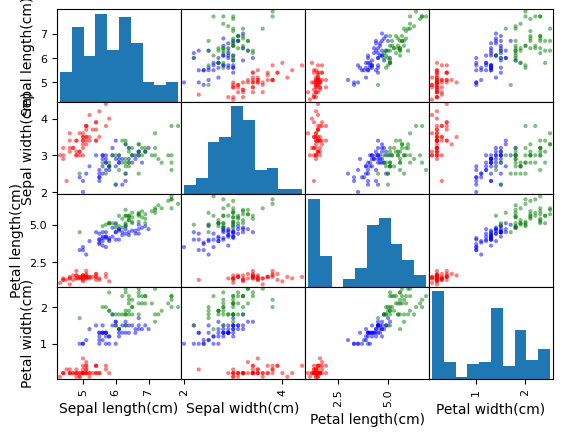

In [23]:
pd.plotting.scatter_matrix(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)","Petal width(cm)"]], c = data_frame["Class color"])
plt.show()

In [24]:
pd.DataFrame.corr(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)","Petal width(cm)"]])

,Sepal length(cm),Sepal width(cm),Petal length(cm),Petal width(cm)
Sepal length(cm),1.000000,-0.117570,0.871754,0.817941
Sepal width(cm),-0.117570,1.000000,-0.428440,-0.366126
Petal length(cm),0.871754,-0.428440,1.000000,0.962865
Petal width(cm),0.817941,-0.366126,0.962865,1.000000


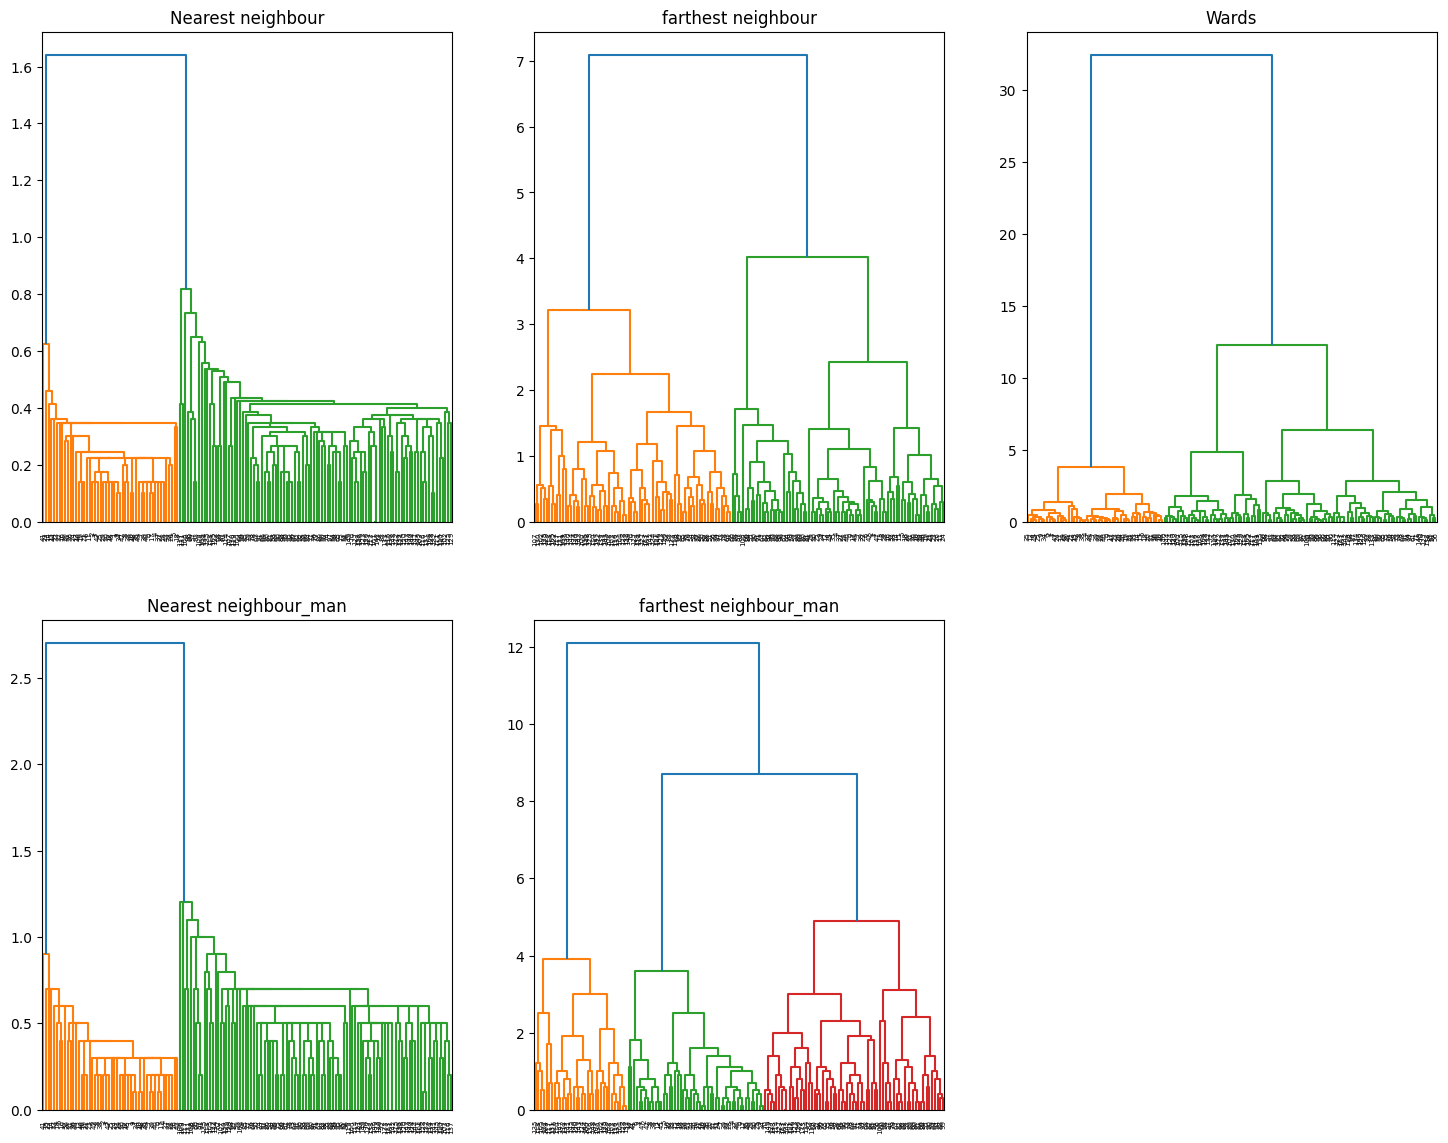

In [25]:
linkage_matrix_nearest = scipy.cluster.hierarchy.linkage(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)",
                                                                     "Petal width(cm)"]],"single")
linkage_matrix_farthest = scipy.cluster.hierarchy.linkage(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)",
                                                                     "Petal width(cm)"]],"complete")
linkage_matrix_ward = scipy.cluster.hierarchy.linkage(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)",
                                                                     "Petal width(cm)"]],"ward")

plt.figure(figsize =(18,14))
plt.subplot(2,3,1)
plt.title("Nearest neighbour")
scipy.cluster.hierarchy.dendrogram(linkage_matrix_nearest)  
plt.subplot(2,3,2)
plt.title("farthest neighbour")
scipy.cluster.hierarchy.dendrogram(linkage_matrix_farthest)
plt.subplot(2,3,3)
plt.title("Wards")
scipy.cluster.hierarchy.dendrogram(linkage_matrix_ward)  

linkage_matrix_nearest_man = scipy.cluster.hierarchy.linkage(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)",
                                                                     "Petal width(cm)"]],"single",metric="cityblock")
linkage_matrix_farthest_man  = scipy.cluster.hierarchy.linkage(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)",
                                                                     "Petal width(cm)"]],"complete",metric="cityblock")


plt.subplot(2,3,4)
plt.title("Nearest neighbour_man")
scipy.cluster.hierarchy.dendrogram(linkage_matrix_nearest_man)  
plt.subplot(2,3,5)
plt.title("farthest neighbour_man")
scipy.cluster.hierarchy.dendrogram(linkage_matrix_farthest_man)
plt.show()

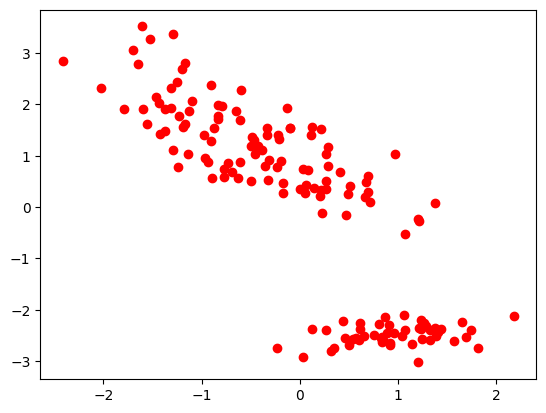

In [36]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
transformed_data = mds.fit_transform(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)","Petal width(cm)"]])
plt.plot(transformed_data[:,0], transformed_data[:,1], 'ro')
plt.show()

[0.72962445 0.22850762]


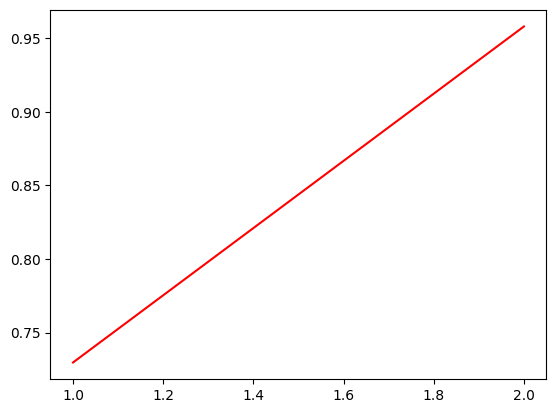

In [76]:
scaler = sklearn.preprocessing.StandardScaler()
data_norm = scaler.fit_transform(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)","Petal width(cm)"]])

pca = sklearn.decomposition.PCA(n_components=2)
data_2d = pca.fit_transform(data_norm)

print(pca.explained_variance_ratio_)
plt.plot(range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
plt.show()

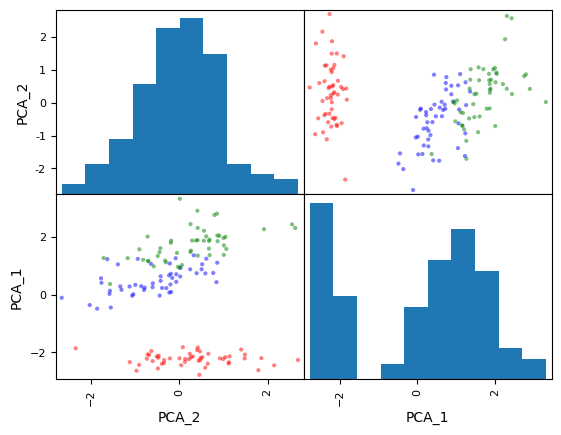

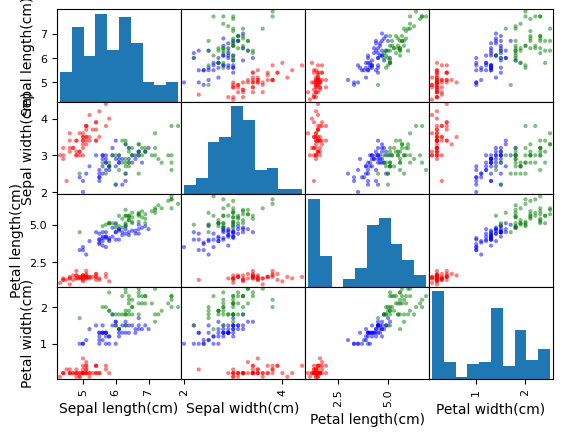

In [75]:
data_PCA = {"PCA_1":data_2d[:,0],"PCA_2":data_2d[:,1],"Class label":iris.target, "Class names":arr_cl, "Class color":arr_cr}
data_PCA_frame = pd.DataFrame(data_PCA)

pd.plotting.scatter_matrix(data_PCA_frame[["PCA_2","PCA_1"]], c = data_PCA["Class color"])
pd.plotting.scatter_matrix(data_frame[["Sepal length(cm)","Sepal width(cm)","Petal length(cm)","Petal width(cm)"]], c = data_frame["Class color"])
plt.show()

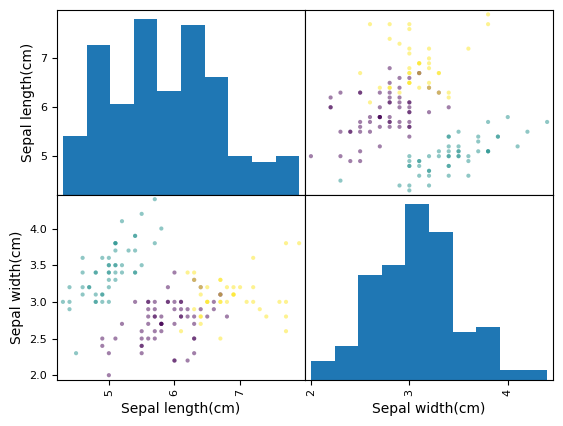

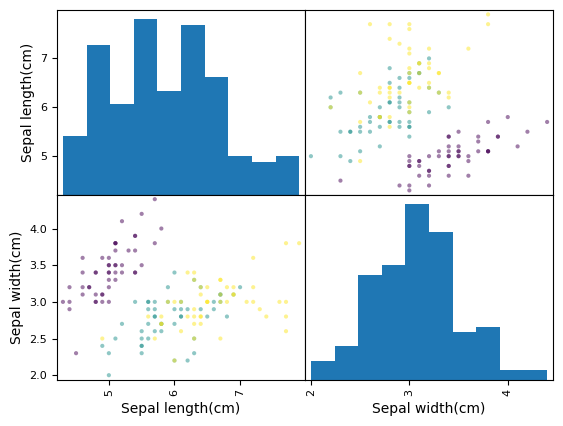

In [136]:
k_means = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data_frame[["Sepal length(cm)","Sepal width(cm)",
                                                                            "Petal length(cm)","Petal width(cm)"]])

pd.plotting.scatter_matrix(data_frame[["Sepal length(cm)","Sepal width(cm)"]], c = k_means.labels_ )
pd.plotting.scatter_matrix(data_frame[["Sepal length(cm)","Sepal width(cm)"]], c = data_frame["Class label"])
plt.show()